In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from pandas import DataFrame
from matplotlib import pyplot
from scipy.stats import norm 
from functools import reduce

# Standard plotly imports
from chart_studio import plotly as py
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
import plotly.figure_factory as ff
#dedicated functions for creating very specific types of plots

import warnings
warnings.filterwarnings("ignore")

## Data understanding and pre-processing

In [2]:
df_mxp = pd.read_csv('/Users/adamzsolt/Documents/CCT/CA2/CA2-CCT/FAOSTAT_data_5-4-2022-8.csv')
df_mxp

Unnamed: 0            Unnamed: 1     Unnamed: 2  \
0            NaN                   NaN            NaN   
1    1990 [1990]    Meat, cattle [867]   Hungary [97]   
2    1990 [1990]    Meat, cattle [867]  Ireland [104]   
3    1990 [1990]  Meat, chicken [1058]   Hungary [97]   
4    1990 [1990]  Meat, chicken [1058]  Ireland [104]   
..           ...                   ...            ...   
246  2020 [2020]      Meat, pig [1035]  Ireland [104]   
247  2020 [2020]     Meat, sheep [977]   Hungary [97]   
248  2020 [2020]     Meat, sheep [977]  Ireland [104]   
249          NaN                   NaN            NaN   
250          NaN                   NaN            NaN   

    Export Quantity Index (2014-2016 = 100) [495]  \
0                                            Unit   
1                                           index   
2                                           index   
3                                           index   
4                                           index   
..                                            ...   
246                                         index   
247                                         index   
248                                         index   
249                                           NaN   
250                                           NaN   

    Export Quantity Index (2014-2016 = 100) [495].1  \
0                                             Value   
1                                               304   
2                                                88   
3                                               100   
4                                                22   
..                                              ...   
246                                             108   
247                                             194   
248                                             130   
249                                             NaN   
250                                             NaN   

    Export Quantity Index (2014-2016 = 100) [495].2  \
0                                  Flag Description   
1                                   Calculated data   
2                                   Calculated data   
3                                   Calculated data   
4                                   Calculated data   
..                                              ...   
246                                 Calculated data   
247                                 Calculated data   
248                                 Calculated data   
249                                             NaN   
250                                             NaN   

    Export Unit/Value Index (2014-2016 = 100)  \
0                                        Unit   
1                                       index   
2                                       index   
3                                       index   
4                                       index   
..                                        ...   
246                                     index   
247                                     index   
248                                     index   
249                                       NaN   
250                                       NaN   

    Export Unit/Value Index (2014-2016 = 100).1  \
0                                         Value   
1                                            51   
2                                            50   
3                                            43   
4                                           110   
..                                          ...   
246                                         107   
247                                         101   
248                                         110   
249                                         NaN   
250                                         NaN   

    Export Unit/Value Index (2014-2016 = 100).2 Export Value Base Price [95]  \
0                              Flag Description                         Unit   


In [3]:
df_mxp.shape

(251, 33)

In [4]:
df_mxp.isnull().sum()

Unnamed: 0                                         3
Unnamed: 1                                         3
Unnamed: 2                                         3
Export Quantity Index (2014-2016 = 100) [495]      4
Export Quantity Index (2014-2016 = 100) [495].1    4
Export Quantity Index (2014-2016 = 100) [495].2    4
Export Unit/Value Index (2014-2016 = 100)          4
Export Unit/Value Index (2014-2016 = 100).1        4
Export Unit/Value Index (2014-2016 = 100).2        4
Export Value Base Price [95]                       4
Export Value Base Price [95].1                     4
Export Value Base Price [95].2                     4
Export Value Base Quantity [94]                    4
Export Value Base Quantity [94].1                  4
Export Value Base Quantity [94].2                  4
Export Value Index (2014-2016 = 100) [492]         3
Export Value Index (2014-2016 = 100) [492].1       3
Export Value Index (2014-2016 = 100) [492].2       3
Import Quantity Index (2014-2016 = 100) [465] 

In [5]:
df_mxp = df_mxp.dropna()

In [6]:
df_mxp.isnull().sum()

Unnamed: 0                                         0
Unnamed: 1                                         0
Unnamed: 2                                         0
Export Quantity Index (2014-2016 = 100) [495]      0
Export Quantity Index (2014-2016 = 100) [495].1    0
Export Quantity Index (2014-2016 = 100) [495].2    0
Export Unit/Value Index (2014-2016 = 100)          0
Export Unit/Value Index (2014-2016 = 100).1        0
Export Unit/Value Index (2014-2016 = 100).2        0
Export Value Base Price [95]                       0
Export Value Base Price [95].1                     0
Export Value Base Price [95].2                     0
Export Value Base Quantity [94]                    0
Export Value Base Quantity [94].1                  0
Export Value Base Quantity [94].2                  0
Export Value Index (2014-2016 = 100) [492]         0
Export Value Index (2014-2016 = 100) [492].1       0
Export Value Index (2014-2016 = 100) [492].2       0
Import Quantity Index (2014-2016 = 100) [465] 

In [7]:
df_mxp.shape

(242, 33)

In [8]:
df_mxp = df_mxp.iloc[:,[0,1,2,4,7,10,13,16]]

new_cols=['Year','Item','Country','Export_Quantity_Index','Export_Unit/Value_Index',
          'Export_Value_Base_Price','Export_Value_Base_Quantity','Export_Value_Index']

df_mxp.rename(columns=dict(zip(df_mxp.columns[0:], new_cols)),inplace=True)
df_mxp


df_mxp.head()

Year                  Item        Country Export_Quantity_Index  \
1  1990 [1990]    Meat, cattle [867]   Hungary [97]                   304   
2  1990 [1990]    Meat, cattle [867]  Ireland [104]                    88   
3  1990 [1990]  Meat, chicken [1058]   Hungary [97]                   100   
4  1990 [1990]  Meat, chicken [1058]  Ireland [104]                    22   
5  1990 [1990]      Meat, pig [1035]   Hungary [97]                   132   

  Export_Unit/Value_Index Export_Value_Base_Price Export_Value_Base_Quantity  \
1                      51                  110051                      18373   
2                      50                 1706663                     977585   
3                      43                  558710                     238479   
4                     110                   21097                     109103   
5                      55                  489006                     204559   

  Export_Value_Index  
1                155  
2                 45  
3                 43  
4                 24  
5                 73

In [9]:
df_mxp['Year'] = df_mxp['Year'].apply(lambda x: x[:4])
df_mxp['Item'] = df_mxp['Item'].apply(lambda x: x.split()[1])
df_mxp['Country'] = df_mxp['Country'].apply(lambda x: x.split()[0])
df_mxp.head()

Year     Item  Country Export_Quantity_Index Export_Unit/Value_Index  \
1  1990   cattle  Hungary                   304                      51   
2  1990   cattle  Ireland                    88                      50   
3  1990  chicken  Hungary                   100                      43   
4  1990  chicken  Ireland                    22                     110   
5  1990      pig  Hungary                   132                      55   

  Export_Value_Base_Price Export_Value_Base_Quantity Export_Value_Index  
1                  110051                      18373                155  
2                 1706663                     977585                 45  
3                  558710                     238479                 43  
4                   21097                     109103                 24  
5                  489006                     204559                 73

In [10]:
df_mxp = df_mxp.sort_values(['Country','Year'], ascending=[True, True])
#using sort function I got the values in order by the year and the item name
df_mxp.head()

Year     Item  Country Export_Quantity_Index Export_Unit/Value_Index  \
1   1990   cattle  Hungary                   304                      51   
3   1990  chicken  Hungary                   100                      43   
5   1990      pig  Hungary                   132                      55   
9   1991   cattle  Hungary                   248                      53   
11  1991  chicken  Hungary                    61                      65   

   Export_Value_Base_Price Export_Value_Base_Quantity Export_Value_Index  
1                   110051                      18373                155  
3                   558710                     238479                 43  
5                   489006                     204559                 73  
9                    89843                      19346                133  
11                  342389                     362597                 40

In [11]:
df_mxp.shape

(242, 8)

In [12]:
df_ppi = pd.read_csv('/Users/adamzsolt/Documents/CCT/CA2/CA2-CCT/FAOSTAT_data_5-5-2022.csv')
df_ppi.head()

Domain Code           Domain  Area Code (FAO)     Area  Element Code  \
0          PP  Producer Prices               97  Hungary          5539   
1          PP  Producer Prices               97  Hungary          5539   
2          PP  Producer Prices               97  Hungary          5539   
3          PP  Producer Prices               97  Hungary          5539   
4          PP  Producer Prices               97  Hungary          5539   

                                  Element  Item Code           Item  \
0  Producer Price Index (2014-2016 = 100)        867   Meat, cattle   
1  Producer Price Index (2014-2016 = 100)       1058  Meat, chicken   
2  Producer Price Index (2014-2016 = 100)       1035      Meat, pig   
3  Producer Price Index (2014-2016 = 100)        977    Meat, sheep   
4  Producer Price Index (2014-2016 = 100)        867   Meat, cattle   

   Year Code  Year  Months Code        Months  Unit  Value Flag  \
0       1995  1995         7021  Annual value   NaN     38   Im   
1       1995  1995         7021  Annual value   NaN     37   Im   
2       1995  1995         7021  Annual value   NaN     48   Im   
3       1995  1995         7021  Annual value   NaN     33   Im   
4       1996  1996         7021  Annual value   NaN     39   Im   

                           Flag Description  
0  FAO data based on imputation methodology  
1  FAO data based on imputation methodology  
2  FAO data based on imputation methodology  
3  FAO data based on imputation methodology  
4  FAO data based on imputation methodology

In [13]:
df_ppi = df_ppi[['Value','Item','Year','Area']]
df_ppi['Item'] = df_ppi['Item'].apply(lambda x: x.split()[1])
df_ppi = df_ppi.rename(columns={'Value':'PPI','Area':'Country'})
df_ppi.head()

PPI     Item  Year  Country
0   38   cattle  1995  Hungary
1   37  chicken  1995  Hungary
2   48      pig  1995  Hungary
3   33    sheep  1995  Hungary
4   39   cattle  1996  Hungary

In [14]:
df_livestock = pd.read_csv('/Users/adamzsolt/Documents/CCT/CA2/CA2-CCT/FAOSTAT_data_5-8-2022.csv')
df_livestock.head()

Domain Code                        Domain  Area Code (FAO)     Area  \
0         QCL  Crops and livestock products               97  Hungary   
1         QCL  Crops and livestock products               97  Hungary   
2         QCL  Crops and livestock products               97  Hungary   
3         QCL  Crops and livestock products               97  Hungary   
4         QCL  Crops and livestock products               97  Hungary   

   Element Code Element  Item Code (FAO)    Item  Year Code  Year  Unit  \
0          5111  Stocks              866  Cattle       1995  1995  Head   
1          5111  Stocks              866  Cattle       1996  1996  Head   
2          5111  Stocks              866  Cattle       1997  1997  Head   
3          5111  Stocks              866  Cattle       1998  1998  Head   
4          5111  Stocks              866  Cattle       1999  1999  Head   

    Value Flag Flag Description  
0  910000  NaN    Official data  
1  928000  NaN    Official data  
2  909000  NaN    Official data  
3  871000  NaN    Official data  
4  873000  NaN    Official data

In [15]:
df_livestock = df_livestock[['Value','Item','Year','Area']]
df_livestock = df_livestock.rename(columns={'Area':'Country','Value':'Livestock_value'})
df_livestock.head()

Livestock_value    Item  Year  Country
0           910000  Cattle  1995  Hungary
1           928000  Cattle  1996  Hungary
2           909000  Cattle  1997  Hungary
3           871000  Cattle  1998  Hungary
4           873000  Cattle  1999  Hungary

In [16]:
df_livestock = df_livestock.sort_values(['Country','Year'], ascending=[True, True])
#using sort function I got the values in order by the year and the item name
df_livestock.head()

Livestock_value      Item  Year  Country
0            910000    Cattle  1995  Hungary
26            33906  Chickens  1995  Hungary
52          4356000      Pigs  1995  Hungary
78           947000     Sheep  1995  Hungary
1            928000    Cattle  1996  Hungary

In [17]:
df_ppi.shape,df_mxp.shape,df_livestock.shape

((200, 4), (242, 8), (205, 4))

In [18]:
df_mxp['Year'] = df_mxp['Year'].astype(int)
df_ppi['Year'] = df_ppi['Year'].astype(int)
df_livestock['Year'] = df_livestock['Year'].astype(int)

dfs = [df_mxp,df_ppi,df_livestock]

df = reduce(lambda df_left,df_right: pd.merge(df_left, df_right, on=['Year','Item','Country'],
                                              left_index=True, right_index=True, 
                                              how='outer'), dfs)
df.head()

Year     Item  Country Export_Quantity_Index Export_Unit/Value_Index  \
0  1995   cattle  Hungary                   NaN                     NaN   
1  1990   cattle  Hungary                   304                      51   
2  1990   cattle  Ireland                    88                      50   
3  1990  chicken  Hungary                   100                      43   
4  1990  chicken  Ireland                    22                     110   

  Export_Value_Base_Price Export_Value_Base_Quantity Export_Value_Index   PPI  \
0                     NaN                        NaN                NaN  38.0   
1                  110051                      18373                155  37.0   
2                 1706663                     977585                 45  48.0   
3                  558710                     238479                 43  33.0   
4                   21097                     109103                 24  39.0   

   Livestock_value  
0         910000.0  
1         928000.0  
2         909000.0  
3         871000.0  
4         873000.0

In [19]:
df = df.dropna(axis=0)
df.isnull().sum()

Year                          0
Item                          0
Country                       0
Export_Quantity_Index         0
Export_Unit/Value_Index       0
Export_Value_Base_Price       0
Export_Value_Base_Quantity    0
Export_Value_Index            0
PPI                           0
Livestock_value               0
dtype: int64

In [20]:
df.shape

(193, 10)

In [21]:
df.head()

Year     Item  Country Export_Quantity_Index Export_Unit/Value_Index  \
1  1990   cattle  Hungary                   304                      51   
2  1990   cattle  Ireland                    88                      50   
3  1990  chicken  Hungary                   100                      43   
4  1990  chicken  Ireland                    22                     110   
5  1990      pig  Hungary                   132                      55   

  Export_Value_Base_Price Export_Value_Base_Quantity Export_Value_Index   PPI  \
1                  110051                      18373                155  37.0   
2                 1706663                     977585                 45  48.0   
3                  558710                     238479                 43  33.0   
4                   21097                     109103                 24  39.0   
5                  489006                     204559                 73  48.0   

   Livestock_value  
1         928000.0  
2         909000.0  
3         871000.0  
4         873000.0  
5         857000.0

In [22]:
df.tail()

Year     Item  Country Export_Quantity_Index Export_Unit/Value_Index  \
195  2014  chicken  Hungary                    97                     112   
196  2014  chicken  Ireland                    82                     123   
197  2014      pig  Hungary                    97                     115   
198  2014      pig  Ireland                    89                     115   
199  2014    sheep  Hungary                    51                     118   

    Export_Value_Base_Price Export_Value_Base_Quantity Export_Value_Index  \
195                  542469                     629427                109   
196                   79893                     122453                104   
197                  357956                     425631                111   
198                  408662                     532829                103   
199                     714                       1809                 65   

       PPI  Livestock_value  
195  105.0        4830000.0  
196   93.0        5170000.0  
197  103.0        5007000.0  
198   96.0        5096800.0  
199  114.0        5138700.0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 1 to 199
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        193 non-null    int64  
 1   Item                        193 non-null    object 
 2   Country                     193 non-null    object 
 3   Export_Quantity_Index       193 non-null    object 
 4   Export_Unit/Value_Index     193 non-null    object 
 5   Export_Value_Base_Price     193 non-null    object 
 6   Export_Value_Base_Quantity  193 non-null    object 
 7   Export_Value_Index          193 non-null    object 
 8   PPI                         193 non-null    float64
 9   Livestock_value             193 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 16.6+ KB


In [24]:
df['Year'] = df['Year'].apply(lambda x: pd.to_datetime(str(x), format='%Y'))
df['Year'] = df['Year'].apply(lambda x: x.strftime('%Y'))

In [25]:
df.head()

Year     Item  Country Export_Quantity_Index Export_Unit/Value_Index  \
1  1990   cattle  Hungary                   304                      51   
2  1990   cattle  Ireland                    88                      50   
3  1990  chicken  Hungary                   100                      43   
4  1990  chicken  Ireland                    22                     110   
5  1990      pig  Hungary                   132                      55   

  Export_Value_Base_Price Export_Value_Base_Quantity Export_Value_Index   PPI  \
1                  110051                      18373                155  37.0   
2                 1706663                     977585                 45  48.0   
3                  558710                     238479                 43  33.0   
4                   21097                     109103                 24  39.0   
5                  489006                     204559                 73  48.0   

   Livestock_value  
1         928000.0  
2         909000.0  
3         871000.0  
4         873000.0  
5         857000.0

In [26]:
to_int = df.columns.drop(['Year','Country','Item'])
df[to_int] = df[to_int].apply(pd.to_numeric, errors='coerce').astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 1 to 199
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        193 non-null    object
 1   Item                        193 non-null    object
 2   Country                     193 non-null    object
 3   Export_Quantity_Index       193 non-null    int64 
 4   Export_Unit/Value_Index     193 non-null    int64 
 5   Export_Value_Base_Price     193 non-null    int64 
 6   Export_Value_Base_Quantity  193 non-null    int64 
 7   Export_Value_Index          193 non-null    int64 
 8   PPI                         193 non-null    int64 
 9   Livestock_value             193 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 16.6+ KB


In [28]:
df.describe()

Export_Quantity_Index  Export_Unit/Value_Index  \
count             193.000000               193.000000   
mean               94.911917                90.554404   
std                82.313916                28.888766   
min                 2.000000                38.000000   
25%                55.000000                71.000000   
50%                79.000000                89.000000   
75%               109.000000               109.000000   
max               820.000000               200.000000   

       Export_Value_Base_Price  Export_Value_Base_Quantity  \
count             1.930000e+02                1.930000e+02   
mean              4.198114e+05                3.851174e+05   
std               6.313909e+05                4.480729e+05   
min               2.700000e+01                8.440000e+02   
25%               4.724500e+04                9.754000e+04   
50%               2.266080e+05                2.722240e+05   
75%               3.455520e+05                4.891660e+05   
max               2.815796e+06                2.235690e+06   

       Export_Value_Index         PPI  Livestock_value  
count          193.000000  193.000000     1.930000e+02  
mean            79.927461   81.642487     2.529288e+06  
std             60.268366   21.479197     2.526835e+06  
min              2.000000   33.000000     1.099100e+04  
25%             48.000000   67.000000     7.010000e+05  
50%             66.000000   80.000000     1.462000e+06  
75%             98.000000   97.000000     5.007000e+06  
max            643.000000  144.000000     7.555000e+06

## Data Visualisation

In [29]:
domain1 = np.linspace(np.min(df['Export_Quantity_Index']), np.max(df['Export_Quantity_Index']))
domain2 = np.linspace(np.min(df['Export_Unit/Value_Index']), np.max(df['Export_Unit/Value_Index']))
domain3 = np.linspace(np.min(df['Export_Value_Base_Price']), np.max(df['Export_Value_Base_Price']))
domain4 = np.linspace(np.min(df['Export_Value_Base_Quantity']), np.max(df['Export_Value_Base_Quantity']))
domain5 = np.linspace(np.min(df['Export_Value_Index']), np.max(df['Export_Value_Index']))
domain6 = np.linspace(np.min(df['PPI']), np.max(df['PPI']))
domain7 = np.linspace(np.min(df['Livestock_value']), np.max(df['Livestock_value']))

average1 = df['Export_Quantity_Index'].mean()
mode1 = df['Export_Quantity_Index'].mode()
middle1 = df['Export_Quantity_Index'].median()
std1 = np.std(df['Export_Quantity_Index'], ddof=1)

average2 = df['Export_Unit/Value_Index'].mean()
mode2 = df['Export_Unit/Value_Index'].mode()
middle2 = df['Export_Unit/Value_Index'].median()
std2 = np.std(df['Export_Unit/Value_Index'], ddof=1)

average3 = df['Export_Value_Base_Price'].mean()
mode3 = df['Export_Value_Base_Price'].mode()
middle3 = df['Export_Value_Base_Price'].median()
std3 = np.std(df['Export_Value_Base_Price'], ddof=1)

average4 = df['Export_Value_Base_Quantity'].mean()
mode4 = df['Export_Value_Base_Quantity'].mode()
middle4 = df['Export_Value_Base_Quantity'].median()
std4 = np.std(df['Export_Value_Base_Quantity'], ddof=1)

average5 = df['Export_Value_Index'].mean()
mode5 = df['Export_Value_Index'].mode()
middle5= df['Export_Value_Index'].median()
std5 = np.std(df['Export_Value_Index'], ddof=1)

average6 = df['PPI'].mean()
mode6 = df['PPI'].mode()
middle6 = df['PPI'].median()
std6 = np.std(df['PPI'], ddof=1)

average7 = df['Livestock_value'].mean()
mode7 = df['Livestock_value'].mode()
middle7 = df['Livestock_value'].median()
std7 = np.std(df['Livestock_value'], ddof=1)

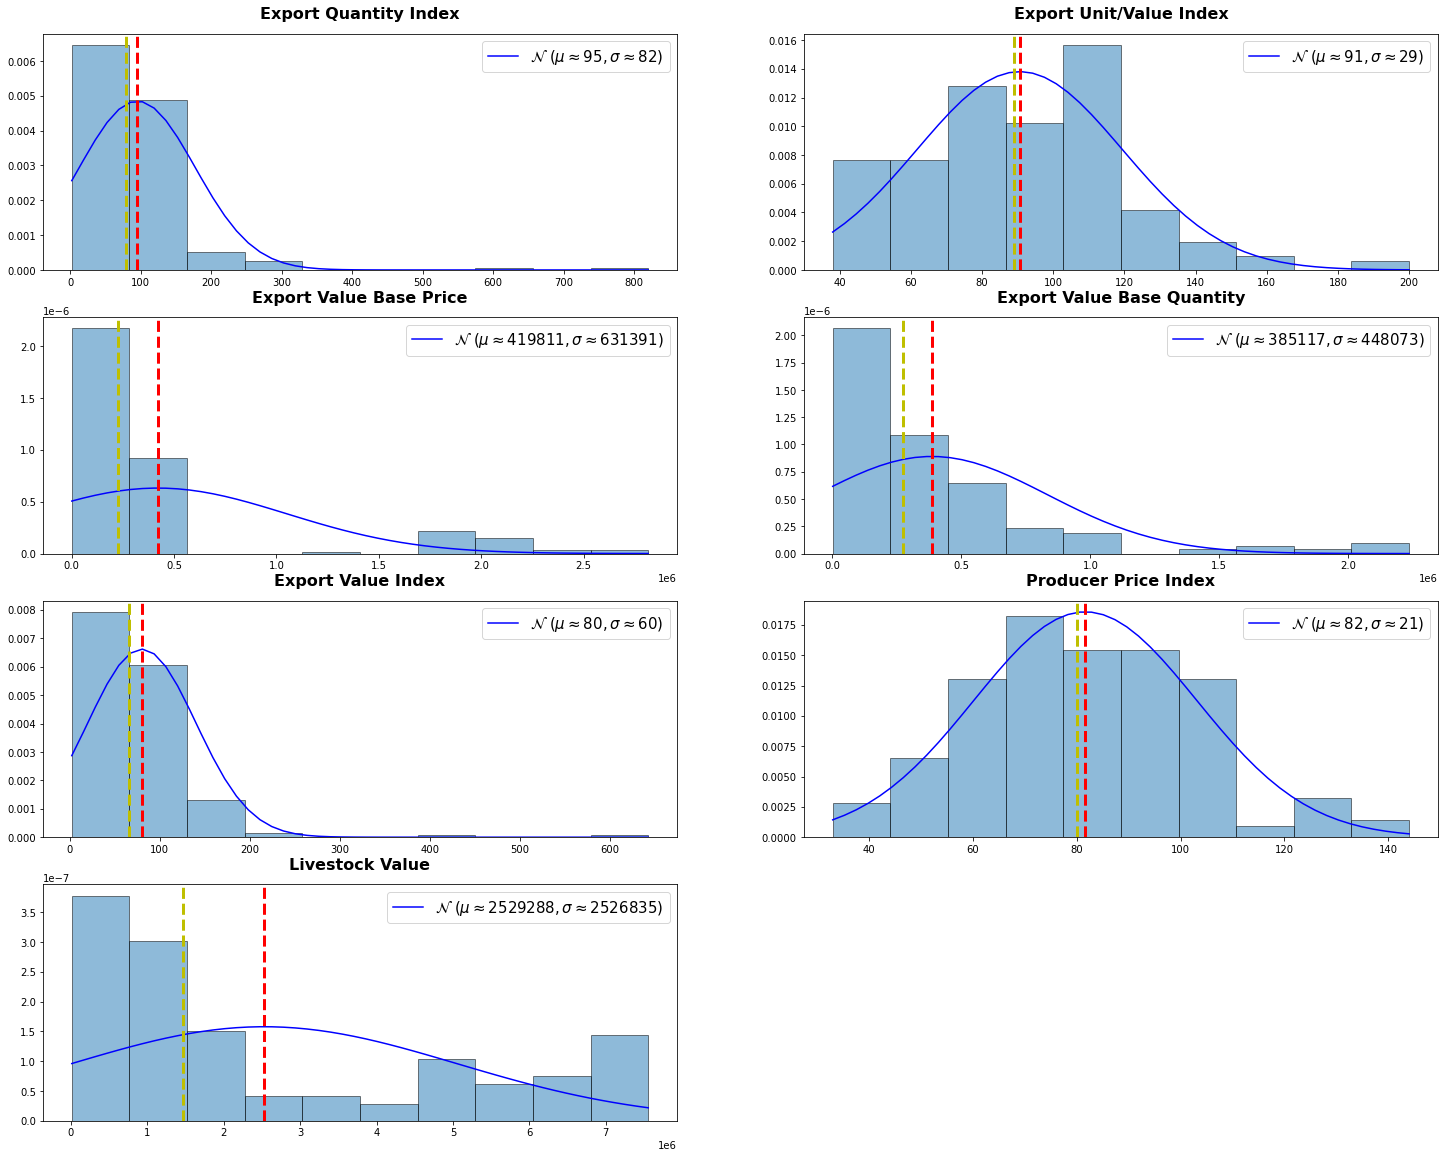

In [30]:
figure, (axs) =  plt.subplots(4,2, figsize=(25,20 ))

axs[0,0].plot(domain1, norm.pdf(domain1,average1,std1),color='blue',
        label='$\mathcal{N}$ '+f'$( \mu \\approx {round(average1)} , \sigma \\approx {round(std1)} )$')
axs[0,0].axvline(average1, color='r', linestyle='dashed', linewidth=3)
axs[0,0].axvline(middle1, color='y', linestyle='dashed', linewidth=3)
axs[0,0].hist(df['Export_Quantity_Index'], edgecolor='black',alpha=.5,density=True)
axs[0,0].set_title('Export Quantity Index', fontsize=16, fontweight='bold',pad=15)
axs[0,0].legend(prop={"size":15})

axs[0,1].plot(domain2, norm.pdf(domain2,average2,std2),color='blue',
        label='$\mathcal{N}$ '+f'$( \mu \\approx {round(average2)} , \sigma \\approx {round(std2)} )$')
axs[0,1].axvline(average2, color='r', linestyle='dashed', linewidth=3)
axs[0,1].axvline(middle2, color='y', linestyle='dashed', linewidth=3)
axs[0,1].hist(df['Export_Unit/Value_Index'], edgecolor='black',alpha=.5,density=True)
axs[0,1].set_title('Export Unit/Value Index', fontsize=16, fontweight='bold',pad=15)
axs[0,1].legend(prop={"size":15})

axs[1,0].plot(domain3, norm.pdf(domain3,average3,std3),color='blue',
        label='$\mathcal{N}$ '+f'$( \mu \\approx {round(average3)} , \sigma \\approx {round(std3)} )$')
axs[1,0].axvline(average3, color='r', linestyle='dashed', linewidth=3)
axs[1,0].axvline(middle3, color='y', linestyle='dashed', linewidth=3)
axs[1,0].hist(df['Export_Value_Base_Price'], edgecolor='black',alpha=.5,density=True)
axs[1,0].set_title('Export Value Base Price', fontsize=16, fontweight='bold',pad=15)
axs[1,0].legend(prop={"size":15})

axs[1,1].plot(domain4, norm.pdf(domain4,average4,std4),color='blue',
        label='$\mathcal{N}$ '+f'$( \mu \\approx {round(average4)} , \sigma \\approx {round(std4)} )$')
axs[1,1].axvline(average4, color='r', linestyle='dashed', linewidth=3)
axs[1,1].axvline(middle4, color='y', linestyle='dashed', linewidth=3)
axs[1,1].hist(df['Export_Value_Base_Quantity'], edgecolor='black',alpha=.5,density=True)
axs[1,1].set_title('Export Value Base Quantity', fontsize=16, fontweight='bold',pad=15)
axs[1,1].legend(prop={"size":15})

axs[2,0].plot(domain5, norm.pdf(domain5,average5,std5),color='blue',
        label='$\mathcal{N}$ '+f'$( \mu \\approx {round(average5)} , \sigma \\approx {round(std5)} )$')
axs[2,0].axvline(average5, color='r', linestyle='dashed', linewidth=3)
axs[2,0].axvline(middle5, color='y', linestyle='dashed', linewidth=3)
axs[2,0].hist(df['Export_Value_Index'], edgecolor='black',alpha=.5,density=True)
axs[2,0].set_title('Export Value Index', fontsize=16, fontweight='bold',pad=15)
axs[2,0].legend(prop={"size":15})

axs[2,1].plot(domain6, norm.pdf(domain6,average6,std6),color='blue',
        label='$\mathcal{N}$ '+f'$( \mu \\approx {round(average6)} , \sigma \\approx {round(std6)} )$')
axs[2,1].axvline(average6, color='r', linestyle='dashed', linewidth=3)
axs[2,1].axvline(middle6, color='y', linestyle='dashed', linewidth=3)
axs[2,1].hist(df['PPI'], edgecolor='black',alpha=.5,density=True)
axs[2,1].set_title('Producer Price Index', fontsize=16, fontweight='bold',pad=15)
axs[2,1].legend(prop={"size":15})

axs[3,0].plot(domain7, norm.pdf(domain7,average7,std7),color='blue',
        label='$\mathcal{N}$ '+f'$( \mu \\approx {round(average7)} , \sigma \\approx {round(std7)} )$')
axs[3,0].axvline(average7, color='r', linestyle='dashed', linewidth=3)
axs[3,0].axvline(middle7, color='y', linestyle='dashed', linewidth=3)
axs[3,0].hist(df['Livestock_value'], edgecolor='black',alpha=.5,density=True)
axs[3,0].set_title('Livestock Value', fontsize=16, fontweight='bold',pad=15)
axs[3,0].legend(prop={"size":15})

axs[3,1].set_axis_off()
plt.show();

In [31]:
vars = ['Export_Quantity_Index','Export_Unit/Value_Index',
    'Export_Value_Base_Price','Export_Value_Base_Quantity','Export_Value_Index','PPI','Livestock_value']


fig = make_subplots(rows=3, cols=3)
for i, var in enumerate(vars):
    fig.add_trace(
       go.Box(y=df[var],
        name=var),
        row=(i//3)+1, col=(i%3)+1
    )
fig.update_layout(title_text='Box plots for numeric features',width=1000, height=1500)
fig.update_traces(boxpoints='all', jitter=.3)

I have created a function to detect and remove outliers from numeric features but as one of my category would have been removed complitelly I decided to not to remove outliers as my data would lose important facts. 

In [32]:
#def clean_data(df):
    #for col in df.columns:
        #if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            #Q1 = df[col].quantile(0.25)
            #Q3 = df[col].quantile(0.75)
            #IQR = Q3 - Q1
            #df=df[~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]
    #return df

#df = clean_data(df)

Export_Quantity_Index  Export_Unit/Value_Index  \
Export_Quantity_Index                    1.000000                -0.327748   
Export_Unit/Value_Index                 -0.327748                 1.000000   
Export_Value_Base_Price                  0.019949                -0.362943   
Export_Value_Base_Quantity              -0.134179                -0.043197   
Export_Value_Index                       0.909695                 0.033940   
PPI                                      0.014261                 0.071180   
Livestock_value                         -0.060786                 0.174827   

                            Export_Value_Base_Price  \
Export_Quantity_Index                      0.019949   
Export_Unit/Value_Index                   -0.362943   
Export_Value_Base_Price                    1.000000   
Export_Value_Base_Quantity                 0.810246   
Export_Value_Index                        -0.117004   
PPI                                        0.047566   
Livestock_value                           -0.051661   

                            Export_Value_Base_Quantity  Export_Value_Index  \
Export_Quantity_Index                        -0.134179            0.909695   
Export_Unit/Value_Index                      -0.043197            0.033940   
Export_Value_Base_Price                       0.810246           -0.117004   
Export_Value_Base_Quantity                    1.000000           -0.137705   
Export_Value_Index                           -0.137705            1.000000   
PPI                                           0.063987            0.078416   
Livestock_value                               0.000366            0.027722   

                                 PPI  Livestock_value  
Export_Quantity_Index       0.014261        -0.060786  
Export_Unit/Value_Index     0.071180         0.174827  
Export_Value_Base_Price     0.047566        -0.051661  
Export_Value_Base_Quantity  0.063987         0.000366  
Export_Value_Index          0.078416         0.027722  
PPI                         1.000000         0.101155  
Livestock_value             0.101155         1.000000

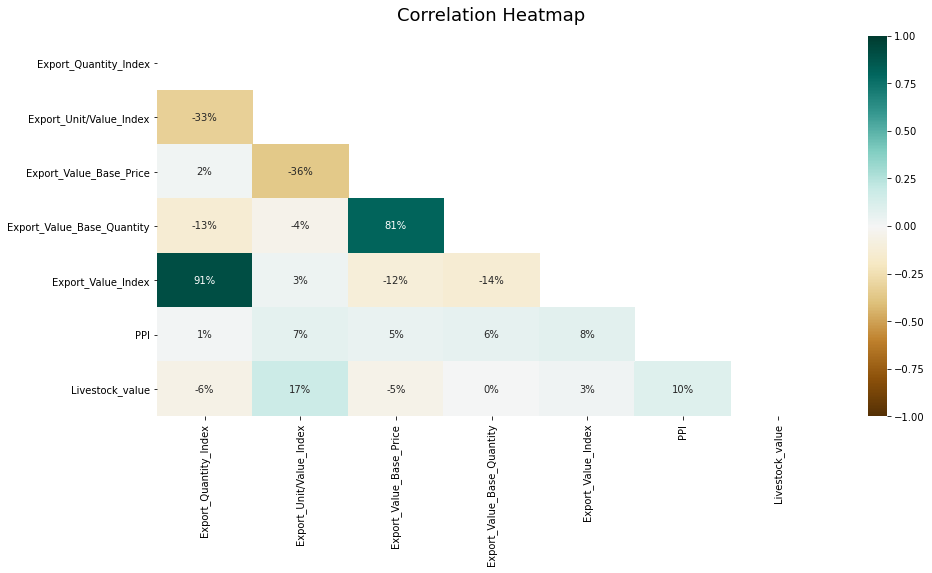

In [33]:
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(df.corr(method = "pearson"), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, fmt='.0%', cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=15);
df.corr()

In [34]:
df.var()

Export_Quantity_Index         6.775581e+03
Export_Unit/Value_Index       8.345608e+02
Export_Value_Base_Price       3.986545e+11
Export_Value_Base_Quantity    2.007693e+11
Export_Value_Index            3.632276e+03
PPI                           4.613559e+02
Livestock_value               6.384894e+12
dtype: float64

In [35]:
df.cov()

Export_Quantity_Index  Export_Unit/Value_Index  \
Export_Quantity_Index                6.775581e+03            -7.793676e+02   
Export_Unit/Value_Index             -7.793676e+02             8.345608e+02   
Export_Value_Base_Price              1.036814e+06            -6.620121e+06   
Export_Value_Base_Quantity          -4.948879e+06            -5.591498e+05   
Export_Value_Index                   4.512931e+03             5.909251e+01   
PPI                                  2.521314e+01             4.416799e+01   
Livestock_value                     -1.264306e+07             1.276186e+07   

                            Export_Value_Base_Price  \
Export_Quantity_Index                  1.036814e+06   
Export_Unit/Value_Index               -6.620121e+06   
Export_Value_Base_Price                3.986545e+11   
Export_Value_Base_Quantity             2.292260e+11   
Export_Value_Index                    -4.452339e+06   
PPI                                    6.450834e+05   
Livestock_value                       -8.242032e+10   

                            Export_Value_Base_Quantity  Export_Value_Index  \
Export_Quantity_Index                    -4.948879e+06        4.512931e+03   
Export_Unit/Value_Index                  -5.591498e+05        5.909251e+01   
Export_Value_Base_Price                   2.292260e+11       -4.452339e+06   
Export_Value_Base_Quantity                2.007693e+11       -3.718676e+06   
Export_Value_Index                       -3.718676e+06        3.632276e+03   
PPI                                       6.158222e+05        1.015104e+02   
Livestock_value                           4.148753e+08        4.221742e+06   

                                     PPI  Livestock_value  
Export_Quantity_Index       2.521314e+01    -1.264306e+07  
Export_Unit/Value_Index     4.416799e+01     1.276186e+07  
Export_Value_Base_Price     6.450834e+05    -8.242032e+10  
Export_Value_Base_Quantity  6.158222e+05     4.148753e+08  
Export_Value_Index          1.015104e+02     4.221742e+06  
PPI                         4.613559e+02     5.490140e+06  
Livestock_value             5.490140e+06     6.384894e+12

In [36]:
#Selecting the numeric features only from the dataset
num = ['int64']
df_num = df.select_dtypes(include=num)

#get summary statistics
df_num.agg(["count", "min", "max", "median", "mean", "skew","std"])

Export_Quantity_Index  Export_Unit/Value_Index  \
count              193.000000               193.000000   
min                  2.000000                38.000000   
max                820.000000               200.000000   
median              79.000000                89.000000   
mean                94.911917                90.554404   
skew                 5.371578                 0.540325   
std                 82.313916                28.888766   

        Export_Value_Base_Price  Export_Value_Base_Quantity  \
count              1.930000e+02                1.930000e+02   
min                2.700000e+01                8.440000e+02   
max                2.815796e+06                2.235690e+06   
median             2.266080e+05                2.722240e+05   
mean               4.198114e+05                3.851174e+05   
skew               2.171955e+00                2.215228e+00   
std                6.313909e+05                4.480729e+05   

        Export_Value_Index         PPI  Livestock_value  
count           193.000000  193.000000     1.930000e+02  
min               2.000000   33.000000     1.099100e+04  
max             643.000000  144.000000     7.555000e+06  
median           66.000000   80.000000     1.462000e+06  
mean             79.927461   81.642487     2.529288e+06  
skew              5.284059    0.286417     7.242385e-01  
std              60.268366   21.479197     2.526835e+06

In [37]:
fig = px.scatter(df, x='Export_Value_Index', y='Export_Quantity_Index', color='Item', 
                 trendline="ols", trendline_scope="overall",facet_col="Country",
                 width=900, height=450)

fig.update_layout(title_text='Scatter plots for Export Quantity Index vs. Export Value Index')
fig.show()

In [38]:
fig = px.scatter(df, x='Export_Value_Base_Quantity', y='Export_Value_Base_Price', color='Item', 
                 trendline="ols", trendline_scope="overall", facet_col="Country",
                 width=900, height=450)
fig.update_layout(title_text='Scatter plots for Export Value Base Price vs. Export Value Base Quantity    ')
fig.show()

In [39]:
df_hu = df[df['Country']=='Hungary']
df_ire = df[df['Country']=='Ireland']

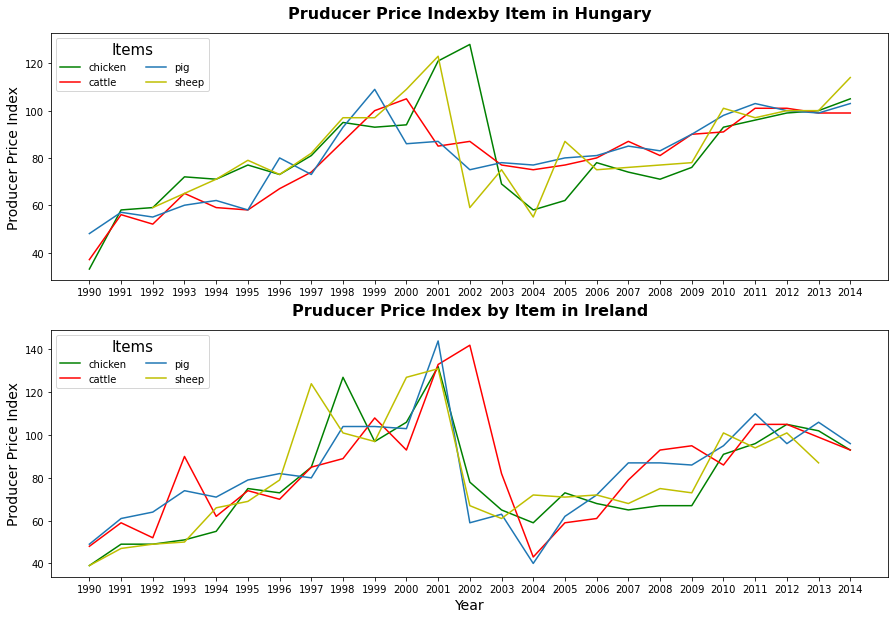

In [40]:
figure, (ax1,ax2) =  plt.subplots(2, figsize=(15,10 ))

df_hu.set_index('Year', inplace=True)
ax1.plot(df_hu.loc[df_hu["Item"] =='chicken', "PPI"], 'g', label='chicken')
ax1.plot(df_hu.loc[df_hu["Item"] =='cattle', "PPI"], 'r', label='cattle')
ax1.plot(df_hu.loc[df_hu["Item"] =='pig', "PPI"], label='pig')
ax1.plot(df_hu.loc[df_hu["Item"] =='sheep', "PPI"], 'y', label='sheep')
ax1.set_title('Pruducer Price Indexby Item in Hungary', fontweight='bold', fontsize=16, pad=15)
ax1.set_ylabel('Producer Price Index', fontsize=14)
ax1.legend(title='Items', title_fontsize=15, ncol=2, loc='upper left')

df_ire.set_index('Year', inplace=True)
ax2.plot(df_ire.loc[df_ire["Item"] =='chicken', "PPI"], 'g', label='chicken')
ax2.plot(df_ire.loc[df_ire["Item"] =='cattle', "PPI"], 'r', label='cattle')
ax2.plot(df_ire.loc[df_ire["Item"] =='pig', "PPI"], label='pig')
ax2.plot(df_ire.loc[df_ire["Item"] =='sheep', "PPI"], 'y', label='sheep')
ax2.set_title('Pruducer Price Index by Item in Ireland', fontweight='bold', fontsize=16, pad=15)
ax2.set_ylabel('Producer Price Index', fontsize=14)
ax2.set_xlabel('Year', fontsize=14)
ax2.legend(title='Items', title_fontsize=15, ncol=2, loc='upper left')

plt.show()

## Visualisation with dashboards

In [41]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import Dropdown

def scatter_plot_int_with_hue(x = 'Export_Value_Index',y = 'Export_Quantity_Index', hue = 'Country'):
    plt.figure(dpi=120)
    sns.set_style('whitegrid')
    return sns.scatterplot(data = df, x = x, y = y, alpha = 0.6, 
                           hue = hue, cmap = 'Set2',legend='full').set_title('Scatter plot for numeric variables', pad=15)

b = interact(scatter_plot_int_with_hue,
             x = widgets.Dropdown(
                 options = ['Export_Quantity_Index','Export_Unit/Value_Index',
    'Export_Value_Base_Price','Export_Value_Base_Quantity','Export_Value_Index','PPI','Livestock_value']
                 ),
             y = widgets.Dropdown(
                 options = ['Export_Quantity_Index','Export_Unit/Value_Index',
    'Export_Value_Base_Price','Export_Value_Base_Quantity','Export_Value_Index','PPI','Livestock_value']
                 ),
              hue = widgets.Dropdown(
                 options = ['Country', 'Item']
                 )
            )

interactive(children=(Dropdown(description='x', options=('Export_Quantity_Index', 'Export_Unit/Value_Index', '…

In [42]:
def cat_plot_int_with_hue( y='PPI'):
    sns.set_theme(font_scale=1.2)
   
    return sns.catplot(x = 'Country', y = y, hue='Item', kind='bar', data=df, height=5, aspect=2, 
                       palette="Set2").set(title='Country comparison for PPI by Export indexes')
    

a = interact(cat_plot_int_with_hue,
             y = widgets.Dropdown(
                 options = ['Export_Quantity_Index','Export_Unit/Value_Index',
    'Export_Value_Base_Price','Export_Value_Base_Quantity','Export_Value_Index','PPI','Livestock_value'], description='Numericals'
                 )
            ) 


interactive(children=(Dropdown(description='Numericals', options=('Export_Quantity_Index', 'Export_Unit/Value_…

In [43]:
df_hu.shape

(94, 9)

In [44]:
df_hu_lstock = df_hu['Livestock_value'][0:50]
df_ire_lstock = df_ire['Livestock_value'][0:50]

In [45]:
from numpy import mean
from numpy import std

print('Livestock_IRE: mean=%.2f stdv=%.2f' % (mean(df_ire_lstock), std(df_ire_lstock)))
print('Livestock_HUN: mean=%.2f stdv=%.2f' % (mean(df_hu_lstock), std(df_hu_lstock)))


Livestock_IRE: mean=1495589.76 stdv=1584737.10
Livestock_HUN: mean=1686157.32 stdv=1823327.90


In [46]:
def fivenum_plusbit(x):
    series=pd.Series(x)
    mi = series.min()
    q1 = series.quantile(q=0.25, interpolation='nearest')
    me = series.median()
    q3 = series.quantile(q=0.75, interpolation='nearest')
    ma = series.max()
    ave = series.mean()
    std = series.std()
    return pd.Series([mi, q1, me, q3, ma, ave, std], index=['minimum:', 'q1:', 'median:', 'q3:',
                                                            'maximum:', 'mean', 'standard deviation:'])

print('Statistical summary for Livestock in Hungary: \n', fivenum_plusbit(df_hu_lstock)), 
print('Statistical summary for Livestock in Ireland: \n', fivenum_plusbit(df_ire_lstock))

Statistical summary for Livestock in Hungary: 
 minimum:               2.947400e+04
q1:                    6.970000e+05
median:                9.390000e+05
q3:                    2.872000e+06
maximum:               6.881600e+06
mean                   1.686157e+06
standard deviation:    1.841839e+06
dtype: float64
Statistical summary for Livestock in Ireland: 
 minimum:               2.769200e+04
q1:                    3.390600e+04
median:                9.090000e+05
q3:                    2.634000e+06
maximum:               5.479000e+06
mean                   1.495590e+06
standard deviation:    1.600826e+06
dtype: float64


In [47]:
fig = px.histogram(df, x="Livestock_value", facet_col="Country", nbins=10, 
                   color_discrete_sequence=['#6a76fc'], title='Livestock distribution by Country')
fig.add_vline(x=df_hu_lstock.mean(), line_width=2, line_dash="dash", line_color="green", col=1)
fig.add_vline(x=df_ire_lstock.mean(), line_width=2, line_dash="dash", line_color="green", col=2)
fig.show()

## Parametric Statistical Significance Tests

### Student’s t-Test

In [48]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(df_ire_lstock, df_hu_lstock)
print('Statistics=%.2f, p=%.2f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-0.55, p=0.58
Same distributions (fail to reject H0)


### Paired Student’s t-Test

In [49]:
from scipy.stats import ttest_rel

stat, p = ttest_rel(df_ire_lstock, df_hu_lstock)
print('Statistics=%.2f, p=%.2f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-0.83, p=0.41
Same distributions (fail to reject H0)


### Analysis of Variance Test (ANOVA)

In [50]:
from scipy.stats import f_oneway

stat, p = f_oneway(df_ire_lstock, df_hu_lstock)
print('Statistics=%.2f, p=%.2f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=0.30, p=0.58
Same distributions (fail to reject H0)


## Nonparametric Statistical Significance Tests

### Shapiro-Wilk test

In [51]:
import scipy.stats as stats

pvalue_ire = stats.shapiro(df_ire_lstock)
pvalue_ire

ShapiroResult(statistic=0.8038738965988159, pvalue=1.0779791637105518e-06)

In [52]:
pvalue_hu = stats.shapiro(df_hu_lstock)
pvalue_hu

ShapiroResult(statistic=0.7977727651596069, pvalue=7.793503300490556e-07)

### Mann-Whitney U Test

In [53]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df_ire_lstock, df_hu_lstock)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=1158.000, p=0.264
Same distribution (fail to reject H0)


### Wilcoxon signed-rank test

In [54]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(df_ire_lstock, df_hu_lstock)
print('Statistics=%.2f, p=%.2f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=570.00, p=0.51
Same distribution (fail to reject H0)


## Standard Scaler

In [55]:
from sklearn.preprocessing import StandardScaler

features = df[['Export_Quantity_Index','Export_Value_Base_Price','Export_Value_Base_Quantity',
       'Export_Value_Index','PPI','Livestock_value','Export_Unit/Value_Index']]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df[['Export_Quantity_Index','Export_Value_Base_Price','Export_Value_Base_Quantity',
       'Export_Value_Index','PPI','Livestock_value','Export_Unit/Value_Index']] = features
df.head()

Year     Item  Country  Export_Quantity_Index  Export_Unit/Value_Index  \
1  1990   cattle  Hungary               2.546737                -1.372758   
2  1990   cattle  Ireland              -0.084189                -1.407463   
3  1990  chicken  Hungary               0.061974                -1.650402   
4  1990  chicken  Ireland              -0.888082                 0.674870   
5  1990      pig  Hungary               0.451741                -1.233935   

   Export_Value_Base_Price  Export_Value_Base_Quantity  Export_Value_Index  \
1                -0.491876                   -0.820622            1.248877   
2                 2.043423                    1.325696           -0.581039   
3                 0.220560                   -0.328116           -0.614311   
4                -0.633128                   -0.617606           -0.930387   
5                 0.109876                   -0.404015           -0.115243   

        PPI  Livestock_value  
1 -2.083811        -0.635361  
2 -1.570356        -0.642900  
3 -2.270522        -0.657977  
4 -1.990456        -0.657184  
5 -1.570356        -0.663532

## Encoding

In [56]:
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder()

new_df = encoder.fit_transform(df[["Item", 'Country']])
new_df[['Export_Quantity_Index','Export_Unit/Value_Index','Export_Value_Base_Price',
        'Export_Value_Base_Quantity','Export_Value_Index','PPI','Livestock_value']] = df[['Export_Quantity_Index','Export_Unit/Value_Index',
                                                                                          'Export_Value_Base_Price','Export_Value_Base_Quantity',
                                                                                          'Export_Value_Index','PPI','Livestock_value']]
new_df.head()

Item  Country  Export_Quantity_Index  Export_Unit/Value_Index  \
1     1        1               2.546737                -1.372758   
2     1        2              -0.084189                -1.407463   
3     2        1               0.061974                -1.650402   
4     2        2              -0.888082                 0.674870   
5     3        1               0.451741                -1.233935   

   Export_Value_Base_Price  Export_Value_Base_Quantity  Export_Value_Index  \
1                -0.491876                   -0.820622            1.248877   
2                 2.043423                    1.325696           -0.581039   
3                 0.220560                   -0.328116           -0.614311   
4                -0.633128                   -0.617606           -0.930387   
5                 0.109876                   -0.404015           -0.115243   

        PPI  Livestock_value  
1 -2.083811        -0.635361  
2 -1.570356        -0.642900  
3 -2.270522        -0.657977  
4 -1.990456        -0.657184  
5 -1.570356        -0.663532

In [57]:
new_df.shape

(193, 9)

## Machine Learning models

In [58]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [59]:
X = new_df.drop(['Export_Unit/Value_Index'], axis=1)

y = df['Export_Unit/Value_Index']

X.shape, y.shape

((193, 8), (193,))

In [60]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [61]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((129, 8), (64, 8), (129,), (64,))

In [62]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

### Linear Regression

In [63]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
pred = lin_reg.predict(X_test)

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_lr = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.36151786079517934
MSE: 0.3828577243599628
RMSE: 0.6187549792607432
R2 Square 0.6206067650651406
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.27094825216503554
MSE: 0.1800889008756759
RMSE: 0.4243688264654649
R2 Square 0.8182707634448534
__________________________________


### Ridge Regression

In [64]:
rg = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
rg.fit(X_train, y_train)
pred = rg.predict(X_test)

test_pred = rg.predict(X_test)
train_pred = rg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_rg = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.6622771482224372
MSE: 0.7537180383503645
RMSE: 0.8681693604074983
R2 Square 0.25310237562388616
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.6565617731073746
MSE: 0.6607288672142448
RMSE: 0.8128523034440174
R2 Square 0.3332528988464185
__________________________________


### Elastic Net

In [65]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

test_pred = gbr.predict(X_test)
train_pred = gbr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_en = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.3038589637624416
MSE: 0.2273433471080798
RMSE: 0.47680535557822734
R2 Square 0.7747138887051463
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.039828599224537846
MSE: 0.0023603419887711953
RMSE: 0.04858335094218178
R2 Square 0.9976181588896221
__________________________________


### Random Forest Regressor

In [66]:
rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(X_train, y_train)

test_pred = rfr.predict(X_test)
train_pred = rfr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_rfr = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.3414002094278989
MSE: 0.24847884270710513
RMSE: 0.4984765217210387
R2 Square 0.7537696487510726
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.1025360939872368
MSE: 0.030034857316269765
RMSE: 0.17330567594937496
R2 Square 0.9696915708653443
__________________________________


### Extra Trees Regressor

In [67]:
etr = ExtraTreesRegressor(n_estimators=1000)
etr.fit(X_train, y_train)

test_pred = etr.predict(X_test)
train_pred = etr.predict(X_train)

print('Test set evaluation:\n_________________________         ____________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_etr = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_________________________         ____________
MAE: 0.2452142952938716
MSE: 0.14098972688061856
RMSE: 0.37548598759556734
R2 Square 0.8602860927953269
__________________________________
Train set evaluation:
_____________________________________
MAE: 9.285692370058922e-15
MSE: 1.6853608723842572e-28
RMSE: 1.2982144939817368e-14
R2 Square 1.0
__________________________________


### Support Vector Machine

In [68]:
svm = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm.fit(X_train, y_train)

test_pred = svm.predict(X_test)
train_pred = svm.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_svm = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.2793279501375612
MSE: 0.2931182395810664
RMSE: 0.5414039523138582
R2 Square 0.7095341949310783
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0010198647644358472
MSE: 1.127119613500433e-06
RMSE: 0.0010616588969628773
R2 Square 0.999998862614043
__________________________________


In [69]:
models_scores_table = pd.DataFrame({'Linear Regression':results_lr,
                                       'Ridge Regression':results_rg,
                                       'Elastic Net':results_en,
                                        'Random Forest Regressior':results_rfr,
                                        'Extra Trees Regressior':results_etr,
                                        'Support Vector Machine':results_svm},
                                   index=['MAE', 'MSE', 'RMSE', 'R2 Square'])
    
    # Add 'Best Score' column
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
models_scores_table.head()

Linear Regression  Ridge Regression  Elastic Net  \
MAE                 0.361518          0.662277     0.303859   
MSE                 0.382858          0.753718     0.227343   
RMSE                0.618755          0.868169     0.476805   
R2 Square           0.620607          0.253102     0.774714   

           Random Forest Regressior  Extra Trees Regressior  \
MAE                        0.341400                0.245214   
MSE                        0.248479                0.140990   
RMSE                       0.498477                0.375486   
R2 Square                  0.753770                0.860286   

           Support Vector Machine              Best Score  
MAE                      0.279328        Ridge Regression  
MSE                      0.293118        Ridge Regression  
RMSE                     0.541404        Ridge Regression  
R2 Square                0.709534  Extra Trees Regressior

In [70]:
models_scores_table.drop(['Best Score'],axis=1, inplace=True)

models = ['Linear Regression','Ridge Regression',
'Elastic Net','Random Forest\nRegressior',
'Extra Trees\nRegressior','Support Vector\nMachine']

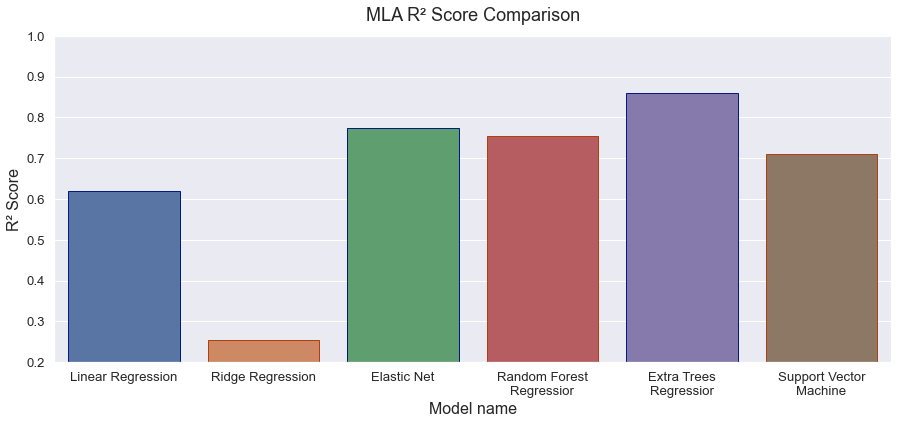

In [71]:
plt.subplots(figsize=(15,6))
plt.ylim([0.2,1])
sns.barplot(models,models_scores_table.iloc[3],edgecolor=sns.color_palette('dark',2))
plt.xticks()
plt.title('MLA R² Score Comparison', fontsize=18, pad=15)
plt.xlabel('Model name', fontsize=16)
plt.ylabel('R² Score', fontsize=16);

## Hyperparameter tuning with Grid Search

### Ridge Regression

In [72]:
# define parameters

param = {
    'solver':['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept':[True, False],
    'normalize':[True, False]
}

In [73]:
# define search
search_rg = GridSearchCV(rg, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=10)
# execute search
result_trg = search_rg.fit(X, y)


In [74]:
print('MAE: %.3f' % result_trg.best_score_)
print('Config: %s' % result_trg.best_params_)

MAE: -0.350
Config: {'alpha': 1e-05, 'fit_intercept': False, 'normalize': True, 'solver': 'svd'}


In [75]:
test_pred = result_trg.predict(X_test)
train_pred = result_trg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_tunned_rg = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.3551585888147998
MSE: 0.33096603235767574
RMSE: 0.5752964734444977
R2 Square 0.6720288878077421
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.2813724670765712
MSE: 0.189557187843123
RMSE: 0.43538165767878073
R2 Square 0.8087162347997645
__________________________________


### Elastic Net

In [76]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

search_gbr = GridSearchCV(gbr, param_grid = parameters, cv = 10, n_jobs=-1)

result_ten = search_gbr.fit(X, y)

In [77]:
print('MAE: %.3f' % result_ten.best_score_)
print('Config: %s' % result_ten.best_params_)

MAE: 0.781
Config: {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 1500, 'subsample': 0.2}


In [78]:
test_pred = result_ten.predict(X_test)
train_pred = result_ten.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_tunned_en = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.009783910269805135
MSE: 0.00013185043045816497
RMSE: 0.011482614269327564
R2 Square 0.9998693426874886
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.009473203203596256
MSE: 0.0001321014819867321
RMSE: 0.011493540881152862
R2 Square 0.9998666952746531
__________________________________


### Random Forest Regressor

In [79]:
search_gsc = GridSearchCV(estimator=RandomForestRegressor(),
            param_grid={
            'max_depth': range(1,10),
            'n_estimators': (10, 50, 100, 1000, 10000),
        },
        cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

result_trfr = search_gbr.fit(X, y)

In [80]:
print('MAE: %.3f' % result_trfr.best_score_)
print('Config: %s' % result_trfr.best_params_)

MAE: 0.796
Config: {'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.1}


In [81]:
test_pred = result_trfr.predict(X_test)
train_pred = result_trfr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_tunned_rfr = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.03465783574994012
MSE: 0.0029403342490739873
RMSE: 0.05422484900001094
R2 Square 0.9970862729114037
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.036061566255985326
MSE: 0.0026639809350766526
RMSE: 0.051613766914231834
R2 Square 0.9973117542548435
__________________________________


### Extra Trees Regressor

In [82]:
param_etr = {
    'n_estimators': [10,50,100,1000,10000],
    'criterion': ['mse', 'mae'],
    'max_depth': [2,8,16,32,50],
    'max_features': ['auto','sqrt','log2'],    
    'bootstrap': [True, False],
    'warm_start': [True, False],
}
search_etr = GridSearchCV(etr,param_etr,cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

result_tetr = search_gbr.fit(X, y)

In [83]:
print('MAE: %.3f' % result_tetr.best_score_)
print('Config: %s' % result_tetr.best_params_)

MAE: 0.760
Config: {'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 1500, 'subsample': 0.1}


In [84]:
test_pred = result_tetr.predict(X_test)
train_pred = result_tetr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_tunned_etr = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.0302024592481746
MSE: 0.0023445947928793093
RMSE: 0.04842101602485546
R2 Square 0.9976766215058898
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.026473297896801872
MSE: 0.001382963188351598
RMSE: 0.037188213029824356
R2 Square 0.9986044401227341
__________________________________


### Support Vector Machine

In [85]:
param_svc = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

search_svc = GridSearchCV(svm, param_svc, refit=True, verbose=0)

result_svc = search_svc.fit(X, y)

In [86]:
print('MAE: %.3f' % result_svc.best_score_)
print('Config: %s' % result_svc.best_params_)

MAE: 0.700
Config: {'C': 1000, 'gamma': 0.01}


In [87]:
test_pred = result_svc.predict(X_test)
train_pred = result_svc.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_tunned_svc = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.08069964995598594
MSE: 0.09246257757967548
RMSE: 0.304076598211167
R2 Square 0.9083741186702907
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.07179853860837455
MSE: 0.04451790616580355
RMSE: 0.21099266851197354
R2 Square 0.9550766034930148
__________________________________


In [88]:
tunned_models_scores_table = pd.DataFrame({'Ridge Regression':results_tunned_rg,
                                       'Elastic Net':results_tunned_en,
                                        'Random Forest Regressior':results_tunned_rfr,
                                        'Extra Trees Regressior':results_tunned_etr,
                                        'Support Vector Machine':results_tunned_svc},
                                   index=['MAE', 'MSE', 'RMSE', 'R2 Square'])
    
    # Add 'Best Score' column
tunned_models_scores_table['Best Score'] = tunned_models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
tunned_models_scores_table.head()

Ridge Regression  Elastic Net  Random Forest Regressior  \
MAE                0.355159     0.009784                  0.034658   
MSE                0.330966     0.000132                  0.002940   
RMSE               0.575296     0.011483                  0.054225   
R2 Square          0.672029     0.999869                  0.997086   

           Extra Trees Regressior  Support Vector Machine        Best Score  
MAE                      0.030202                0.080700  Ridge Regression  
MSE                      0.002345                0.092463  Ridge Regression  
RMSE                     0.048421                0.304077  Ridge Regression  
R2 Square                0.997677                0.908374       Elastic Net

In [89]:
tunned_models_scores_table.drop(['Best Score'],axis=1, inplace=True)
tunned_models = ['Ridge Regression','Elastic Net','Random Forest\nRegressior',
                 'Extra Trees\nRegressior','Support Vector\nMachine']

plt.subplots(figsize=(15,6))
plt.ylim([0.6,1.1])
sns.barplot(tunned_models,tunned_models_scores_table.iloc[3],edgecolor=sns.color_palette('dark',2))
plt.xticks()
plt.title('MLA R² Score Comparison after Grid Search', fontsize=18, pad=15)
plt.xlabel('Model name', fontsize=16)
plt.ylabel('R² Score', fontsize=16);

## Sentiment Analysis

In [90]:
import snscrape.modules.twitter as sntwitter
import re
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [91]:
query = 'livestock ireland'
tweets = []
limit = 5000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    if len(tweets) == limit:
        break
    else:
        tweets.append(tweet)
        
df_tweets = pd.DataFrame(tweets)


In [92]:
df_tweets.head()

url  \
0  https://twitter.com/ZwartblesIE/status/1528373...   
1  https://twitter.com/AllflexIreland/status/1528...   
2  https://twitter.com/AllflexIreland/status/1528...   
3  https://twitter.com/amf_au/status/152824290852...   
4  https://twitter.com/alexjonesAM1/status/152804...   

                       date  \
0 2022-05-22 13:52:18+00:00   
1 2022-05-22 09:01:44+00:00   
2 2022-05-22 08:06:52+00:00   
3 2022-05-22 05:14:37+00:00   
4 2022-05-21 16:12:28+00:00   

                                             content  \
0  @j0hn_k And you thought a change from sheep to...   
1  @patquirke @stierney123 @joelernihan @jheslin1...   
2  @colmthefarmer @allflexuk Hi Colm, I’ve sent y...   
3  @MattMcDonald013 Yep, we are f_cked.\n\nMeat i...   
4  Irish Sea border: Farmers continue facing red ...   

                                     renderedContent                   id  \
0  @j0hn_k And you thought a change from sheep to...  1528373188039741442   
1  @patquirke @stierney123 @joelernihan @jheslin1...  1528300063147151361   
2  @colmthefarmer @allflexuk Hi Colm, I’ve sent y...  1528286255385042944   
3  @MattMcDonald013 Yep, we are f_cked.\n\nMeat i...  1528242908523945984   
4  Irish Sea border: Farmers continue facing red ...  1528046075046776833   

                                                user  replyCount  \
0  {'username': 'ZwartblesIE', 'id': 299804123, '...           1   
1  {'username': 'AllflexIreland', 'id': 135447286...           0   
2  {'username': 'AllflexIreland', 'id': 135447286...           0   
3  {'username': 'amf_au', 'id': 84439451359453184...           0   
4  {'username': 'alexjonesAM1', 'id': 11203813833...           0   

   retweetCount  likeCount  quoteCount  ...  media retweetedTweet quotedTweet  \
0             0          6           0  ...   None           None        None   
1             0          3           0  ...   None           None        None   
2             0          1           0  ...   None           None        None   
3             0          0           0  ...   None           None        None   
4             2          8           0  ...   None           None        None   

  inReplyToTweetId                                      inReplyToUser  \
0     1.528325e+18  {'username': 'j0hn_k', 'id': 219476399, 'displ...   
1     1.528299e+18  {'username': 'patquirke', 'id': 20155325, 'dis...   
2     1.528284e+18  {'username': 'colmthefarmer', 'id': 2151593141...   
3     1.528129e+18  {'username': 'MattMcDonald013', 'id': 10213201...   
4              NaN                                               None   

                                      mentionedUsers coordinates place  \
0  [{'username': 'j0hn_k', 'id': 219476399, 'disp...        None  None   
1  [{'username': 'patquirke', 'id': 20155325, 'di...        None  None   
2  [{'username': 'colmthefarmer', 'id': 215159314...        None  None   
3  [{'username': 'MattMcDonald013', 'id': 1021320...        None  None   
4                                               None        None  None   

  hashtags cashtags  
0     None     None  
1     None     None  
2     None     None  
3     None     None  
4     None     None  

[5 rows x 27 columns]

In [93]:
df_tweets.shape

(4990, 27)

In [94]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   url               4990 non-null   object             
 1   date              4990 non-null   datetime64[ns, UTC]
 2   content           4990 non-null   object             
 3   renderedContent   4990 non-null   object             
 4   id                4990 non-null   int64              
 5   user              4990 non-null   object             
 6   replyCount        4990 non-null   int64              
 7   retweetCount      4990 non-null   int64              
 8   likeCount         4990 non-null   int64              
 9   quoteCount        4990 non-null   int64              
 10  conversationId    4990 non-null   int64              
 11  lang              4990 non-null   object             
 12  source            4990 non-null   object             
 13  sou

In [95]:
df_tweets.describe()

id   replyCount  retweetCount     likeCount   quoteCount  \
count  4.990000e+03  4990.000000   4990.000000   4990.000000  4990.000000   
mean   1.083117e+18     0.823848      3.207816     10.041683     0.297996   
std    3.600971e+17    15.930208    109.281674    361.880500     9.429783   
min    2.635784e+08     0.000000      0.000000      0.000000     0.000000   
25%    9.369524e+17     0.000000      0.000000      0.000000     0.000000   
50%    1.173413e+18     0.000000      0.000000      0.000000     0.000000   
75%    1.357766e+18     1.000000      1.000000      2.000000     0.000000   
max    1.528373e+18  1112.000000   7682.000000  25469.000000   661.000000   

       conversationId  inReplyToTweetId  
count    4.990000e+03      1.850000e+03  
mean     1.080835e+18      1.214769e+18  
std      3.600406e+17      2.573452e+17  
min      2.635784e+08      2.228987e+09  
25%      9.301895e+17      1.095111e+18  
50%      1.171430e+18      1.258393e+18  
75%      1.357047e+18      1.410250e+18  
max      1.528325e+18      1.528325e+18

In [96]:
df_fil_tweets = df_tweets[['id','content']]
df_fil_tweets.head()

id                                            content
0  1528373188039741442  @j0hn_k And you thought a change from sheep to...
1  1528300063147151361  @patquirke @stierney123 @joelernihan @jheslin1...
2  1528286255385042944  @colmthefarmer @allflexuk Hi Colm, I’ve sent y...
3  1528242908523945984  @MattMcDonald013 Yep, we are f_cked.\n\nMeat i...
4  1528046075046776833  Irish Sea border: Farmers continue facing red ...

## Text pre-processing

### Stopwords, special characters, numbers in the text

In [97]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def clean_text(text):
    #First, let's make the text lowercase.
    text = text.lower()
    
    # remove numbers
    text = re.sub(r'\d+', '', text)
    
    #Next, let's remove exclamation marks.
    text_list = text.split('!') #This returns a list of items, split by !.
    text = ''.join(text_list) #This puts the list back into a string. The exclamation marks are gone.
    
    #Same drill, but with other types of punctuation.
    #For each punctuation mark in this list...
    for punctuation in ['.','?',':','@','-','--','_','#','$','%','^','&','*','(',')','"',"'",",",";",'[',']', 'https']:
        #Split the text by that punctuation mark
        text_list = text.split(punctuation)
        #And rejoin it!
        text = ''.join(text_list)
    
    return text

In [98]:
df_fil_tweets['content'] = df_fil_tweets['content'].apply(remove_emojis)
df_fil_tweets['content'] = df_fil_tweets['content'].apply(clean_text)
df_fil_tweets.head()

id                                            content
0  1528373188039741442  jhnk and you thought a change from sheep to ca...
1  1528300063147151361  patquirke stierney joelernihan jheslin send on...
2  1528286255385042944  colmthefarmer allflexuk hi colm i’ve sent you ...
3  1528242908523945984  mattmcdonald yep we are fcked\n\nmeat is the b...
4  1528046075046776833  irish sea border farmers continue facing red t...

In [99]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_fil_tweets['content'] = df_fil_tweets['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_fil_tweets['content'].head()

0    jhnk thought change sheep cattle would elimina...
1    patquirke stierney joelernihan jheslin send cv...
2    colmthefarmer allflexuk hi colm i’ve sent mess...
3    mattmcdonald yep fcked meat big problem povert...
4    irish sea border farmers continue facing red t...
Name: content, dtype: object

### Dealing with most frequented words

In [100]:
freq = pd.Series(' '.join(df_fil_tweets['content']).split()).value_counts()[:10]
freq

livestock    5073
ireland      4648
northern      984
amp           909
brexit        613
farming       577
farmers       510
irish         494
uk            484
food          419
dtype: int64

In [101]:
freq = list(freq.index)
df_fil_tweets['content'] = df_fil_tweets['content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_fil_tweets['content'].head()

0    jhnk thought change sheep cattle would elimina...
1    patquirke stierney joelernihan jheslin send cv...
2    colmthefarmer allflexuk hi colm i’ve sent mess...
3    mattmcdonald yep fcked meat big problem povert...
4    sea border continue facing red tape eu claims ...
Name: content, dtype: object

### Dealing with rare words

In [102]:
freq = pd.Series(' '.join(df_fil_tweets['content']).split()).value_counts()[-10:]
freq

touches                1
dwarf                  1
greatgrandparents      1
//tco/ghafbyyng        1
bjocsbacs              1
saifur                 1
equates                1
ministers              1
http//tco/rlpnjxzwj    1
ditto                  1
dtype: int64

In [103]:
freq = list(freq.index)
df_fil_tweets['content'] = df_fil_tweets['content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_fil_tweets['content'].head()

0    jhnk thought change sheep cattle would elimina...
1    patquirke stierney joelernihan jheslin send cv...
2    colmthefarmer allflexuk hi colm i’ve sent mess...
3    mattmcdonald yep fcked meat big problem povert...
4    sea border continue facing red tape eu claims ...
Name: content, dtype: object

### Spelling correction

In [104]:
from textblob import TextBlob
df_fil_tweets['content'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    think thought change sheep cattle would elimin...
1    patquirke sternly joelernihan jheslin send c p...
2    colmthefarmer allflexuk hi cold i’ve sent mess...
3    mattmcdonald yep asked meat big problem povert...
4    sea border continue facing red tape e claims l...
Name: content, dtype: object

### Tokenization 

In [105]:
import nltk
nltk.download('punkt')
TextBlob(df_fil_tweets['content'][1]).words

[nltk_data] Downloading package punkt to /Users/adamzsolt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['patquirke', 'stierney', 'joelernihan', 'jheslin', 'send', 'cv', 'pat', 'keep', 'file', 'best', 'luck', 'new', 'system'])

### Stemming

In [106]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_fil_tweets['content'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    jhnk thought chang sheep cattl would elimin su...
1    patquirk stierney joelernihan jheslin send cv ...
2    colmthefarm allflexuk hi colm i’v sent messag ...
3    mattmcdonald yep fcked meat big problem povert...
4    sea border continu face red tape eu claim lift...
Name: content, dtype: object

### Lemmatization

In [107]:
nltk.download('wordnet')
from textblob import Word
df_fil_tweets['content'] = df_fil_tweets['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_fil_tweets['content'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adamzsolt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    jhnk thought change sheep cattle would elimina...
1    patquirke stierney joelernihan jheslin send cv...
2    colmthefarmer allflexuk hi colm i’ve sent mess...
3    mattmcdonald yep fcked meat big problem povert...
4    sea border continue facing red tape eu claim l...
Name: content, dtype: object

### Tfidf Vectorizer

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

transformed = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))

transformed = transformed.fit_transform(df_fil_tweets['content'])
transformed

<4990x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 43297 stored elements in Compressed Sparse Row format>

In [109]:
transformed.shape

(4990, 1000)

In [110]:
df_fil_tweets['content'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                   (0.0, 0.0)
1    (0.5681818181818181, 0.37727272727272726)
2                                   (0.0, 0.0)
3                  (0.05, 0.07500000000000001)
4                                   (0.0, 0.0)
Name: content, dtype: object

In [111]:
df_fil_tweets['sentiment'] = df_fil_tweets['content'].apply(lambda x: TextBlob(x).sentiment[0] )
df_fil_tweets['sentiment'] = round(df_fil_tweets['sentiment'],1)
df_fil_tweets[['content','sentiment']].head()

content  sentiment
0  jhnk thought change sheep cattle would elimina...        0.0
1  patquirke stierney joelernihan jheslin send cv...        0.6
2  colmthefarmer allflexuk hi colm i’ve sent mess...        0.0
3  mattmcdonald yep fcked meat big problem povert...        0.0
4  sea border continue facing red tape eu claim l...        0.0

In [112]:
df_fil_tweets.head()

id                                            content  \
0  1528373188039741442  jhnk thought change sheep cattle would elimina...   
1  1528300063147151361  patquirke stierney joelernihan jheslin send cv...   
2  1528286255385042944  colmthefarmer allflexuk hi colm i’ve sent mess...   
3  1528242908523945984  mattmcdonald yep fcked meat big problem povert...   
4  1528046075046776833  sea border continue facing red tape eu claim l...   

   sentiment  
0        0.0  
1        0.6  
2        0.0  
3        0.0  
4        0.0

In [113]:
def labeling(df_fil_tweets):
    if df_fil_tweets['sentiment'] > 0:
        return '1'
    elif df_fil_tweets['sentiment'] < 0:
        return '-1'
    else:
        return '0'

df_fil_tweets['label'] = df_fil_tweets.apply(labeling,axis=1)
df_fil_tweets.head()

id                                            content  \
0  1528373188039741442  jhnk thought change sheep cattle would elimina...   
1  1528300063147151361  patquirke stierney joelernihan jheslin send cv...   
2  1528286255385042944  colmthefarmer allflexuk hi colm i’ve sent mess...   
3  1528242908523945984  mattmcdonald yep fcked meat big problem povert...   
4  1528046075046776833  sea border continue facing red tape eu claim l...   

   sentiment label  
0        0.0     0  
1        0.6     1  
2        0.0     0  
3        0.0     0  
4        0.0     0

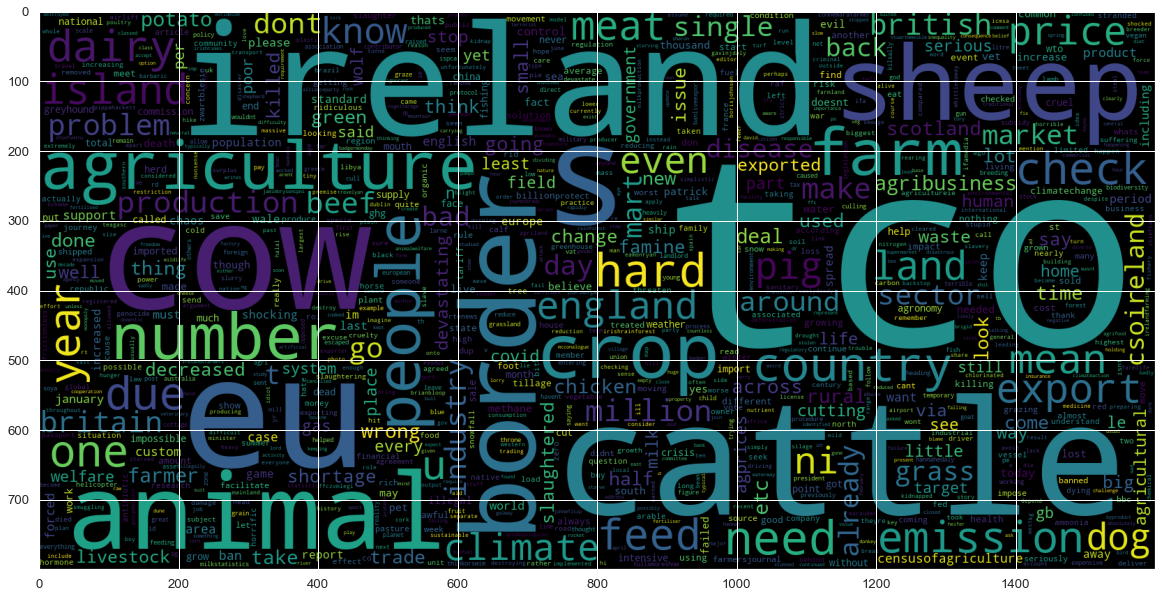

In [114]:
data_neg = df_fil_tweets['content'][df_fil_tweets['label']=='-1']
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_neg))
plt.figure(figsize = (20,15))
plt.imshow(wc);

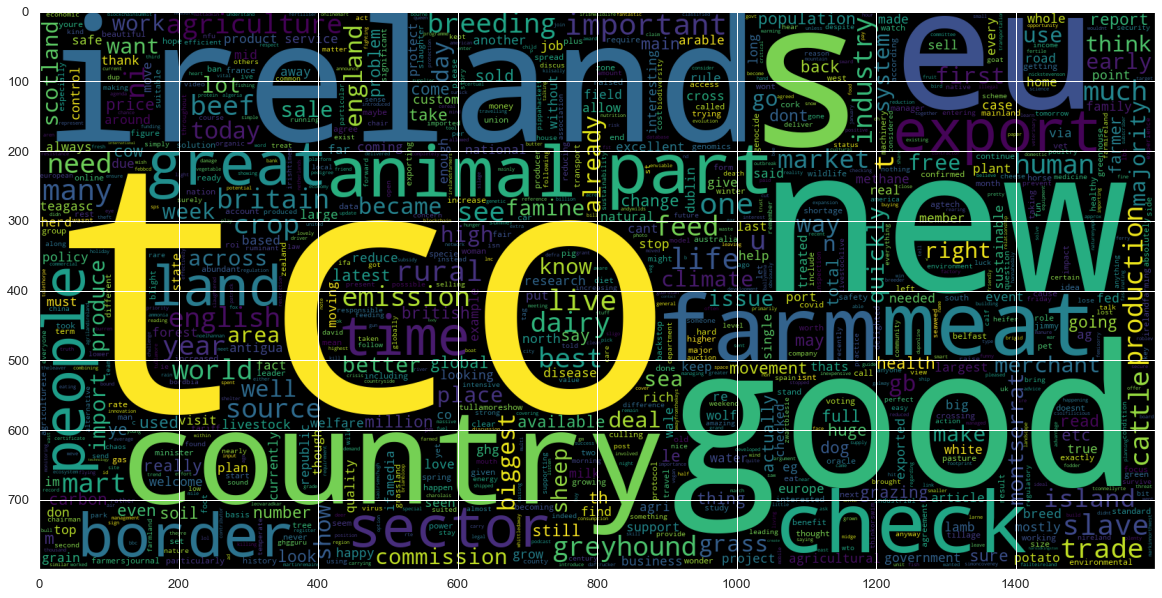

In [115]:
data_pos = df_fil_tweets['content'][df_fil_tweets['label']=='1']
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,15))
plt.imshow(wc);

In [116]:
# Displaying distribution

sns.catplot("label", data=df_fil_tweets, aspect=1.5, kind="count") 
plt.title('Distribution of the Tweets', fontweight='bold', fontsize=18, pad=15)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Tweet count', fontsize=14)
plt.show()

In [117]:
df_fil_tweets['label'].value_counts()

0     2191
1     2053
-1     746
Name: label, dtype: int64

## Machine Learning models

In [118]:
X = transformed 
y = df_fil_tweets['label'] 

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

### Logistic Regression

Logistic Regression Test set Accuracy: 0.6834
Logistic Regression Training set Accuracy: 0.8011
Recall Score : 0.6834
F1 Score : 0.6834


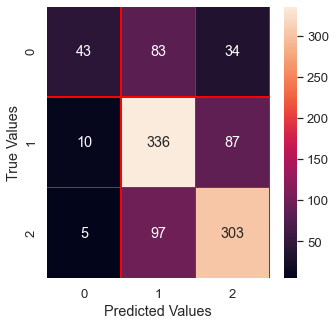

In [120]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

test_acc_lr = round(lr.score(X_test,y_test),4)
training_acc_lr = round(lr.score(X_train,y_train),4)
recall_lr = round(recall_score(y_test,y_pred,average='micro'),4)
f1_score_lr = round(f1_score(y_test,y_pred,average='micro'),4)

print('Logistic Regression Test set Accuracy:', test_acc_lr)
print('Logistic Regression Training set Accuracy:',training_acc_lr)
print('Recall Score :',recall_lr)
print('F1 Score :',f1_score_lr)

#Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

plt.show()

### Decision Tree Classifier

Decision Tree Classifier Test set Accuracy: 0.6693
Decision Tree Classifier Training set Accuracy: 0.998
Recall Score : 0.6693
F1 Score : 0.6693


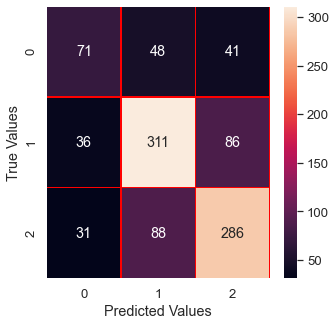

In [121]:
dec = DecisionTreeClassifier()
dec.fit(X_train,y_train)
y_pred = dec.predict(X_test)

test_acc_dec = round(dec.score(X_test,y_test),4)
training_acc_dec = round(dec.score(X_train,y_train),4)
recall_dec = round(recall_score(y_test,y_pred,average='micro'),4)
f1_score_dec = round(f1_score(y_test,y_pred,average='micro'),4)

print('Decision Tree Classifier Test set Accuracy:', test_acc_dec)
print('Decision Tree Classifier Training set Accuracy:',training_acc_dec)
print('Recall Score :',recall_dec)
print('F1 Score :',f1_score_dec)

#Confusion Matrix
cm = confusion_matrix(y_test,y_pred)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

plt.show()

### Support Vector Machine (SVC)

SVC Test set Accuracy: 0.7094
SVC Training set Accuracy: 0.8116
Recall Score : 0.7094
F1 Score : 0.7094


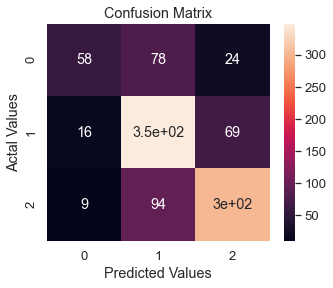

In [122]:
#We use Support Vector classifier as a classifier

#training the classifier using X_Train and y_train 
svc = SVC(kernel = 'linear').fit(X_train,y_train)
svc.predict(X_train)
#Testing the model using X_test and storing the output in y_pred
y_pred = svc.predict(X_test)
# Creating  a confusion matrix,which compares the y_test and y_pred
cm_tunned = confusion_matrix(y_test, y_pred)

test_acc_svc = round(svc.score(X_test,y_test),4)
training_acc_svc = round(svc.score(X_train,y_train),4)
recall_svc = round(recall_score(y_test,y_pred,average='micro'),4)
f1_score_svc = round(f1_score(y_test,y_pred,average='micro'),4)

print('SVC Test set Accuracy:', test_acc_svc)
print('SVC Training set Accuracy:',training_acc_svc)
print('Recall Score :',recall_svc)
print('F1 Score :',f1_score_svc)

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_tunned, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')

plt.show()

In [123]:
senti_models_scores_table = pd.DataFrame({'Logistic Regression':[test_acc_lr,training_acc_lr,recall_lr,f1_score_lr],
                                       'Decision Tree Classifier':[test_acc_dec,training_acc_dec,recall_dec,f1_score_dec],
                                        'Support Vector Machine':[test_acc_svc,training_acc_svc,recall_svc,f1_score_svc]},
                                   index=['Test accuracy', 'Training accuracy', 'Recall score','f1-score'])
    
    # Add 'Best Score' column
senti_models_scores_table['Best Score'] = senti_models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
senti_models_scores_table.head()

Logistic Regression  Decision Tree Classifier  \
Test accuracy                   0.6834                    0.6693   
Training accuracy               0.8011                    0.9980   
Recall score                    0.6834                    0.6693   
f1-score                        0.6834                    0.6693   

                   Support Vector Machine                Best Score  
Test accuracy                      0.7094    Support Vector Machine  
Training accuracy                  0.8116  Decision Tree Classifier  
Recall score                       0.7094    Support Vector Machine  
f1-score                           0.7094    Support Vector Machine

In [124]:
senti_models_scores_table.drop(['Best Score'],axis=1, inplace=True)
senti_models = ['Logistic Regression','Decision Tree\nClassifier','Support Vector\nMachine']

plt.subplots(figsize=(15,6))
plt.ylim([0.1,1])
sns.barplot(senti_models,senti_models_scores_table.iloc[3],edgecolor=sns.color_palette('dark',2))
plt.xticks()
plt.title('MLA Accuracy Score Comparison', fontsize=18, pad=15)
plt.xlabel('Model name', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=16);

## Cross Validation 

In [125]:
from sklearn.model_selection import RepeatedKFold
from sklearn import linear_model, tree, ensemble

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

### Logistic Regression

In [128]:
model = LogisticRegression()

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f ' % (mean(scores)))

Accuracy: 0.700 


In [129]:
algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for algo in algorithms:
    score = cross_val_score(linear_model.LogisticRegression(max_iter= 4000, solver= algo, random_state= 42), 
                            X, y, cv= cv, scoring="accuracy")
    print(f'Average score({algo}): {"{:.3f}".format(score.mean())}')

Average score(newton-cg): 0.700
Average score(lbfgs): 0.700
Average score(liblinear): 0.690
Average score(sag): 0.700
Average score(saga): 0.700


### Decision Tree Classifier

In [130]:
model_dtc = DecisionTreeClassifier()

scores_dtc = cross_val_score(model_dtc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f ' % (mean(scores_dtc)))

Accuracy: 0.671 


In [131]:
max_depth = [5,10,15,20,25]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(max_depth= val, random_state= 42), 
                            X, y, cv= cv, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')



Average score(5): 0.549
Average score(10): 0.582
Average score(15): 0.618
Average score(20): 0.632
Average score(25): 0.647


### Support Vector Machine 

In [132]:
model_svc = SVC()

scores_svc = cross_val_score(model_svc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f ' % (mean(scores_svc)))

Accuracy: 0.703 


In [133]:
# List of C values
C_range = np.logspace(-1, 1, 3)

# List of gamma values
gamma_range = np.logspace(-1, 1, 3)

# Define the search space
param_grid = { 
    # Regularization parameter.
    "C": C_range,
    # Kernel type
    "kernel": ['rbf', 'poly'],
    # Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    "gamma": gamma_range.tolist()+['scale', 'auto']
    }
# Set up score
scoring = ['accuracy']

# Define grid search
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=cv, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train, y_train)
# Print grid search summary
grid_result

# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {grid_result.best_score_:.4f}')

# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the testing dataset is {grid_search.score(X_test, y_test):.4f}')

The best accuracy score for the training dataset is 0.6975
The accuracy score for the testing dataset is 0.7014
